# Credit Card Fraud Detection

## Imports

In [0]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import random

## Loading and Exploring Dataset

In [2]:
# Import and store dataset
credit_card_data = pd.read_csv('/content/drive/My Drive/creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Looking for null values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#Transaction amount difference between normal and fraudulent transaction
print ("Fraud")
print (credit_card_data.Amount[credit_card_data.Class == 1].describe())
print ()
print ("Normal")
print (credit_card_data.Amount[credit_card_data.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


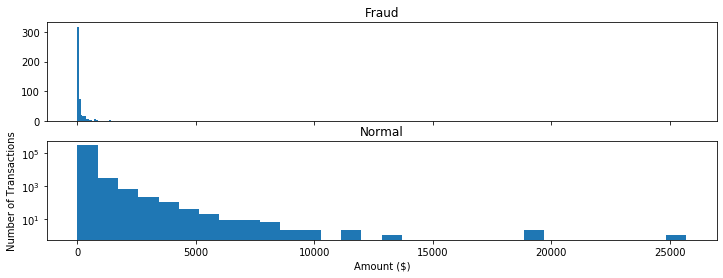

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(credit_card_data.Amount[credit_card_data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(credit_card_data.Amount[credit_card_data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [7]:
#Select only the anonymized features.
v_features = credit_card_data.ix[:,1:29].columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


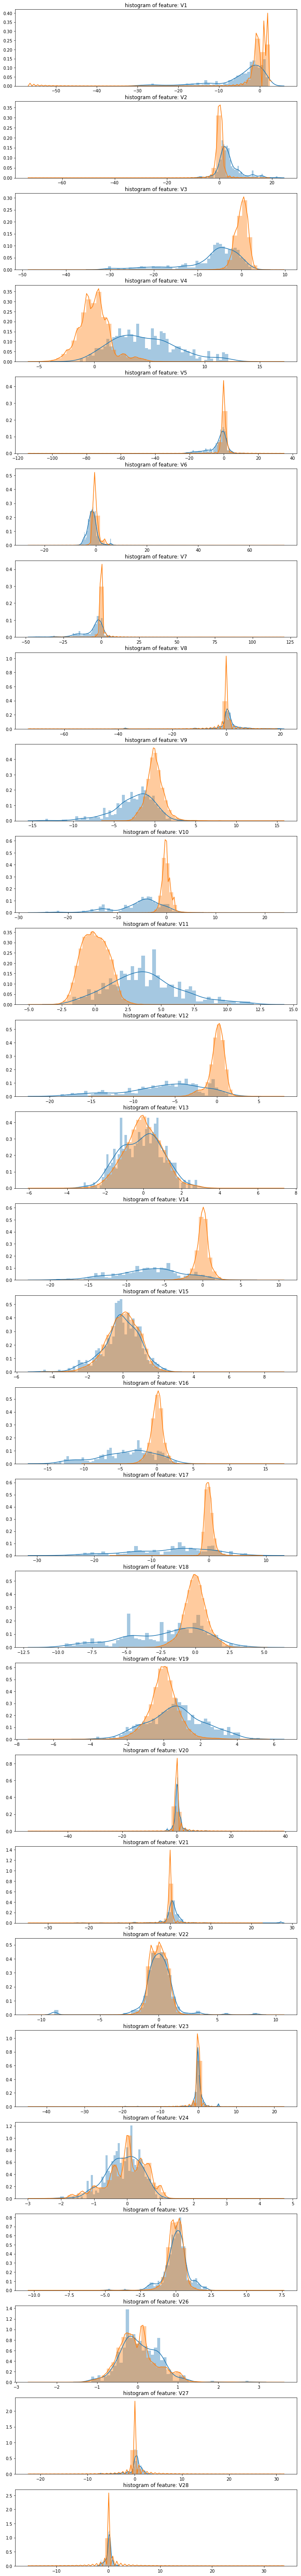

In [8]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(credit_card_data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit_card_data[cn][credit_card_data.Class == 1], bins=50)
    sns.distplot(credit_card_data[cn][credit_card_data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

## Data Prep

In [0]:
#Drop all of the features that have very similar distributions between the two types of transactions.
credit_card_data = credit_card_data.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [0]:
#Based on the plots above, these features are created to identify values where fraudulent transaction are more common.
credit_card_data['V1_'] = credit_card_data.V1.map(lambda x: 1 if x < -3 else 0)
credit_card_data['V2_'] = credit_card_data.V2.map(lambda x: 1 if x > 2.5 else 0)
credit_card_data['V3_'] = credit_card_data.V3.map(lambda x: 1 if x < -4 else 0)
credit_card_data['V4_'] = credit_card_data.V4.map(lambda x: 1 if x > 2.5 else 0)
credit_card_data['V5_'] = credit_card_data.V5.map(lambda x: 1 if x < -4.5 else 0)
credit_card_data['V6_'] = credit_card_data.V6.map(lambda x: 1 if x < -2.5 else 0)
credit_card_data['V7_'] = credit_card_data.V7.map(lambda x: 1 if x < -3 else 0)
credit_card_data['V9_'] = credit_card_data.V9.map(lambda x: 1 if x < -2 else 0)
credit_card_data['V10_'] = credit_card_data.V10.map(lambda x: 1 if x < -2.5 else 0)
credit_card_data['V11_'] = credit_card_data.V11.map(lambda x: 1 if x > 2 else 0)
credit_card_data['V12_'] = credit_card_data.V12.map(lambda x: 1 if x < -2 else 0)
credit_card_data['V14_'] = credit_card_data.V14.map(lambda x: 1 if x < -2.5 else 0)
credit_card_data['V16_'] = credit_card_data.V16.map(lambda x: 1 if x < -2 else 0)
credit_card_data['V17_'] = credit_card_data.V17.map(lambda x: 1 if x < -2 else 0)
credit_card_data['V18_'] = credit_card_data.V18.map(lambda x: 1 if x < -2 else 0)
credit_card_data['V19_'] = credit_card_data.V19.map(lambda x: 1 if x > 1.5 else 0)
credit_card_data['V21_'] = credit_card_data.V21.map(lambda x: 1 if x > 0.6 else 0)

In [0]:
# Shuffle and randomize data
shuffled_data = credit_card_data.sample(frac=1)

#Change Class column into Class_0 ([1 0] for legit data) and Class_1 ([0 1] for fraudulent data)
one_hot_data = pd.get_dummies(shuffled_data, columns=['Class'])

# Change all values into numbers between 0 and 1
normalized_data = (one_hot_data - one_hot_data.min()) / (one_hot_data.max() - one_hot_data.min())

# #Rename 'Class' to 'Fraud'.
normalized_data = normalized_data.rename(columns={'Class_0': 'Normal'})
normalized_data = normalized_data.rename(columns={'Class_1': 'Fraud'})

# Spliting x and y data 
df_X = normalized_data.drop(['Fraud','Normal'], axis=1)
df_y = normalized_data[['Fraud','Normal']]

# Convert both data_frames into np arrays of float32
ar_X, ar_y = np.asarray(df_X.values, dtype='float32'), np.asarray(df_y.values, dtype='float32')

# Allocate first 80% of data into training data and remaining 20% into testing data
train_size = int(0.80 * len(ar_X))
(raw_X_train, raw_y_train) = (ar_X[:train_size], ar_y[:train_size])
(raw_X_test, raw_y_test) = (ar_X[train_size:], ar_y[train_size:])

In [12]:
# Gets a percent of fraud vs legit transactions (0.0017% of transactions are fraudulent)
count_legit, count_fraud = np.unique(df_y['Fraud'], return_counts=True)[1]
fraud_ratio = float(count_fraud / (count_legit + count_fraud))
print('Percent of fraudulent transactions: ', fraud_ratio)

Percent of fraudulent transactions:  0.001727485630620034


In [0]:
# Applies a logit weighting of 578 (1/0.0017) to fraudulent transactions to cause model to pay more attention to them
weighting = 1 / fraud_ratio
raw_y_train[:, 1] = raw_y_train[:, 1] * weighting

In [0]:
def prepare_batches(data, labels, batch_size):
    assert len(data) == len(labels)
    
    all_batches = list()
    for i in range(0, len(data)):
        all_batches.append((data[i], labels[i]))
    random.shuffle(all_batches)
        
    batches = list()
    while len(all_batches) >= batch_size:
        
        data_batch = list()
        labels_batch = list()
        for j in range(0, batch_size):
            data, labels = all_batches.pop()
            data_batch.append(data)
            labels_batch.append(labels)
            
        batches.append((np.array(data_batch), np.array(labels_batch)))
    
    return batches

## Neural Networks Prep

In [0]:
# 36 cells for the input
input_dimensions = ar_X.shape[1]

# 2 cells for the output
output_dimensions = ar_y.shape[1]

# 100 cells for the 1st layer
num_layer_1_cells = 100

# 150 cells for the second layer
num_layer_2_cells = 150

In [0]:
# reset tensorflow graph
tf.reset_default_graph()

# We will use these as inputs to the model when it comes time to train it (assign values at run time)
X_train_node = tf.placeholder(tf.float32, [None, input_dimensions], name='X_train')
y_train_node = tf.placeholder(tf.float32, [None, output_dimensions], name='y_train')

# We will use these as inputs to the model once it comes time to test it
X_test_node = tf.constant(raw_X_test, name='X_test')
y_test_node = tf.constant(raw_y_test, name='y_test')

# First layer takes in input and passes output to 2nd layer
weight_1_node = tf.Variable(tf.zeros([input_dimensions, num_layer_1_cells]), name='weight_1')
biases_1_node = tf.Variable(tf.zeros([num_layer_1_cells]), name='biases_1')

# Second layer takes in input from 1st layer and passes output to 3rd layer
weight_2_node = tf.Variable(tf.zeros([num_layer_1_cells, num_layer_2_cells]), name='weight_2')
biases_2_node = tf.Variable(tf.zeros([num_layer_2_cells]), name='biases_2')

# Third layer takes in input from 2nd layer and outputs [1 0] or [0 1] depending on fraud vs legit
weight_3_node = tf.Variable(tf.zeros([num_layer_2_cells, output_dimensions]), name='weight_3')
biases_3_node = tf.Variable(tf.zeros([output_dimensions]), name='biases_3')

In [0]:
#Function to run an input tensor through the 3 layers and output a tensor that will give us a fraud/legit result
# Each layer uses a different function to fit lines through the data and predict whether a given input tensor will \
#   result in a fraudulent or legitimate transaction

def network(input_tensor):
    
    # Sigmoid fits modified data well
    layer1 = tf.nn.sigmoid(tf.matmul(input_tensor, weight_1_node) + biases_1_node)
    
    # Dropout prevents model from becoming lazy and over confident
    layer2 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer1, weight_2_node) + biases_2_node), 0.85)
    
    # Softmax works very well with one hot encoding which is how results are outputted
    layer3 = tf.nn.softmax(tf.matmul(layer2, weight_3_node) + biases_3_node)
    return layer3

In [0]:
#Hyperparameters

epochs = 5
batch_size = 2048
learning_rate = 0.005

In [19]:
# Used to predict what results will be given training or testing input data
# Remember, X_train_node is just a placeholder for now. We will enter values at run time
y_train_prediction = network(X_train_node)
y_test_prediction = network(X_test_node)

# Cross entropy loss function measures differences between actual output and predicted output
cross_entropy = tf.losses.softmax_cross_entropy(y_train_node, y_train_prediction)

# Adam optimizer function will try to minimize loss (cross_entropy) but changing the 3 layers' variable values at a
#   learning rate of 0.005
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

# Function to calculate the accuracy of the actual result vs the predicted result
def calculate_accuracy(actual, predicted):
    actual = np.argmax(actual, 1)
    predicted = np.argmax(predicted, 1)
    return (100 * np.sum(np.equal(predicted, actual)) / predicted.shape[0])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Training

In [20]:
info = {'loss':[], 'val_loss':[], 'acc':[], 'val_acc':[]}

with tf.Session() as session:
    tf.global_variables_initializer().run()
    for epoch in range(epochs):
        batches = prepare_batches(raw_X_train, raw_y_train, batch_size)
        
        epoch_losses = []
        epoch_accuracy = []
        
        while batches:

            data_inputs, data_labels = batches.pop()
        
            _, batch_loss = session.run([optimizer, cross_entropy],
                                             feed_dict={X_train_node: raw_X_train,
                                                        y_train_node: raw_y_train})
        
            epoch_y_test, epoch_y_test_prediction = y_test_node.eval(),y_test_prediction.eval()
            batch_acc = calculate_accuracy(epoch_y_test, epoch_y_test_prediction)

            epoch_losses.append(batch_loss)
            epoch_accuracy.append(batch_acc)


        train_loss = np.mean(epoch_losses)
        info['loss'].append(train_loss)

        train_accuracy = np.mean(epoch_accuracy)
        info['acc'].append(train_accuracy)
        
        val_loss = session.run(cross_entropy, feed_dict={X_train_node: raw_X_test, 
                                                              y_train_node: raw_y_test})
        info['val_loss'].append(val_loss)

        epoch_y_test, epoch_y_test_prediction = y_test_node.eval(), y_test_prediction.eval()
        val_accuracy = calculate_accuracy(epoch_y_test, epoch_y_test_prediction)
        info['val_acc'].append(val_accuracy)

        print("Epoch: " + str(epoch + 1) + "/" + str(epochs) + ":\n"
              + "      - Training loss: " + str(train_loss) + " (acc: " + str(train_accuracy) + ")\n"
              + "      - Validation loss: " + str(val_loss) + " (acc: " + str(val_accuracy) + ")")
    
    final_y_test, final_y_test_prediction = y_test_node.eval(), y_test_prediction.eval()
    final_val_accuracy = calculate_accuracy(final_y_test, final_y_test_prediction)
    print('Optimization Finished')

Epoch: 1/5:
      - Training loss: 184.90926 (acc: 99.81917769741233)
      - Validation loss: 0.31506994 (acc: 99.81917769741231)
Epoch: 2/5:
      - Training loss: 181.03242 (acc: 99.81917769741233)
      - Validation loss: 0.31506994 (acc: 99.81917769741231)
Epoch: 3/5:
      - Training loss: 181.03242 (acc: 99.81917769741233)
      - Validation loss: 0.31506994 (acc: 99.81917769741231)
Epoch: 4/5:
      - Training loss: 181.03242 (acc: 99.81917769741233)
      - Validation loss: 0.31506994 (acc: 99.81917769741231)
Epoch: 5/5:
      - Training loss: 181.03242 (acc: 99.81917769741233)
      - Validation loss: 0.31506994 (acc: 99.81917769741231)
Optimization Finished


## Model Analysis

In [25]:
final_fraud_y_test = final_y_test[final_y_test[:, 1] == 1]
final_fraud_y_test_prediction = final_y_test_prediction[final_y_test[:, 1] == 1]
final_fraud_accuracy = calculate_accuracy(final_fraud_y_test, final_fraud_y_test_prediction)
print('Final fraud specific accuracy: {0:.2f}%'.format(final_fraud_accuracy))

Final fraud specific accuracy: 100.00%


In [33]:
# Test the model
prediction=tf.argmax(raw_X_test,1)
print('\n', sklearn.metrics.classification_report(np.where(raw_y_test > 0)[1], 
                                                  np.argmax(prediction, axis=1)))

NotImplementedError: ignored

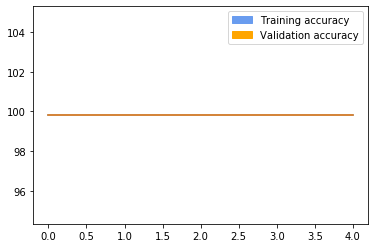

In [26]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(info['acc'], label='Training acc')
ax1.plot(info['val_acc'], label='Validation acc')
blue_patch = mpatches.Patch(color='#699cef', label='Training accuracy')
orange_patch = mpatches.Patch(color='orange', label='Validation accuracy')
ax1.legend(handles=[blue_patch, orange_patch])
plt.show()

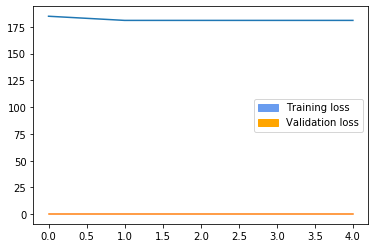

In [27]:
fig1 = plt.figure()
ax2 = fig1.add_subplot(111)
ax2.plot(info['loss'], label='Training loss')
ax2.plot(info['val_loss'], label='Validation loss')
blue_patch = mpatches.Patch(color='#699cef', label='Training loss')
orange_patch = mpatches.Patch(color='orange', label='Validation loss')
ax2.legend(handles=[blue_patch, orange_patch])
plt.show()

In [0]:
session.close()